# Problem 1: Sequential, Consecutive Letters Checker

This program checks if a given word or phrase contains three consecutive, sequential letters in the alphabet. Examples of valid sequences include "abc", "def", and "xyz". For instance, words like “defrost” contain "def", while "student" contains "stu".

## Approach and Key Decisions

The program uses a `main()` function to manage the overall flow. It includes the following components:

1. **User Input**:
   - A function captures user input, ensuring that it is handled appropriately.

2. **Sequential Checker**:
   - The core logic to check for three consecutive sequential letters is encapsulated in a separate function. This function iterates over the string to identify any valid sequences of three consecutive letters.

3. **Output**:
   - If a sequential, consecutive set of letters is found, the program outputs a message indicating success; otherwise, it informs the user that no such sequence was found.

This solution keeps the code modular and organized, with each function handling a specific task.

### Challenges and Issues
- One challenge encountered was correctly handling mixed cases (uppercase and lowercase letters). The solution was to convert the input to lowercase before processing.
- Another aspect to consider was ensuring that non-alphabet characters (like spaces and punctuation) do not interfere with the detection of sequences.

The program is flexible enough to handle phrases, as it strips out non-alphabet characters before checking for consecutive letters.

In [ ]:
#############################################################
# AUTHOR:     Group 5
# COURSE:     ANLY 615
# PROGRAM:    Problem 1: Sequential, Consecutive Letters Checker
# PURPOSE:    This program checks if a word or phrase contains three
#             consecutive, sequential letters in the alphabet.
# HONOR CODE: On my honor, as an Aggie, I have neither given
#             nor received unauthorized aid on this academic work.
#############################################################

# Function to capture user input
def get_user_input():
    # Prompt user to enter a word or phrase
    return input("Enter a word or phrase to check for consecutive letters: ")

# Function to check for three consecutive, sequential letters
def has_consecutive_sequence(text):
    # Convert the text to lowercase to handle mixed case
    text = text.lower()

    # Iterate through the text, excluding non-alphabet characters
    for i in range(len(text) - 2):
        # Check if current, next, and next+1 characters are sequential
        if (text[i].isalpha() and
            ord(text[i]) + 1 == ord(text[i + 1]) and
            ord(text[i]) + 2 == ord(text[i + 2])):
            return True
    return False

# Main function to control the program flow
def main():
    # Get user input
    user_text = get_user_input()

    # Check for three consecutive, sequential letters
    if has_consecutive_sequence(user_text):
        print("The input contains three consecutive, sequential letters in the alphabet.")
    else:
        print("The input does NOT contain three consecutive, sequential letters in the alphabet.")

# Execute main function
if __name__ == "__main__":
    main()

Enter a word or phrase to check for consecutive letters: Defrost
The input contains three consecutive, sequential letters in the alphabet.


# Problem 2: Curved Grading for Exam Scores

This program reads numeric exam scores from a file named `Scores.txt` and determines letter grades based on a curved grading algorithm. The curved grading scale uses statistical measures—mean and standard deviation—to set cut-off points for each letter grade (A, B, C, D, and F).

## Approach and Key Decisions

The program is structured around a `main()` function that controls the flow and organizes all tasks into distinct functions:

1. **Reading Data**:
   - A function reads and loads the exam scores from the file. It also performs basic error handling if scores are not in the expected format.

2. **Descriptive Statistics Calculation**:
   - Another function calculates the mean and standard deviation directly from the scores. We also obtain the minimum, maximum, and total count of scores.

3. **Grade Assignment**:
   - The program uses the computed mean and standard deviation to establish cut-off points for each grade. It assigns a letter grade to each score based on these points.

4. **Output and File Creation**:
   - Results are displayed in formatted tables: one for the descriptive statistics and another showing the grade distribution.
   - A new file, `Scores-and-Letter-Grades.txt`, is created to store each score alongside its assigned letter grade.

### Challenges
One challenge involved choosing between lists and dictionaries for storing grades. Ultimately, dictionaries provided an efficient way to count occurrences of each grade.

This modular approach keeps the code clean and flexible, making it adaptable to different grading scales or additional grading rules if needed.

In [ ]:
#############################################################
# AUTHOR:     Group 5
# COURSE:     ANLY 615
# PROGRAM:    Project-Fall-2024 - Problem 2: Curved Grading for Exam Scores
# PURPOSE:    This program reads exam scores, calculates descriptive statistics,
#             applies a curved grading scale, and assigns letter grades.
#             The results are displayed and saved to a new file.
# HONOR CODE: On my honor, as an Aggie, I have neither given
#             nor received unauthorized aid on this academic work.
#############################################################

#This is to mount the google drive to the accesable files in the script
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#This changes the working directory to this project foler
import os

# Change to the directory where your file is located
os.chdir('/content/drive/Shared drives/MSA Team 5/Coding Projects')

# Verify current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/Shared drives/MSA Team 5/Coding Projects


In [ ]:
def read_scores_from_file(filename):
  with open(filename, 'r') as file:
    scores = [int(line.strip()) for line in file]
  return scores

#Below is to test the function
# score_list = read_scores_from_file('Scores.txt')
# print(score_list)
# print(len(score_list))
# print(type(score_list[0]))
# for score in score_list:
#   if score<59.3:
#     print(score)


[62, 71, 62, 86, 61, 60, 78, 65, 84, 99, 82, 78, 77, 81, 66, 67, 70, 59, 67, 100, 71, 80, 77, 67, 91, 88, 55, 81, 62, 94, 72, 55, 77, 62, 57, 73, 61, 61, 100, 91, 100, 86, 98, 83, 58, 66, 94, 61, 58, 99, 87, 99, 93, 89, 86, 73, 97, 68, 87, 98, 64, 81, 57, 56, 59, 96, 84, 98, 55, 91, 67, 63, 93, 90, 79, 93, 71, 66, 79, 85, 67, 62, 87, 76, 79, 100, 67, 55, 87, 79, 84, 73, 82, 99, 95, 85, 58, 82, 55, 65, 87, 63, 92, 81, 74, 72, 100, 75, 77, 86, 91, 96, 92, 60, 85, 56, 97, 77, 99, 93, 88, 90, 73, 62, 95, 86, 76, 64, 95, 78, 93, 96, 86, 74, 77, 94, 88, 81, 75, 63, 78, 67, 99, 73, 99, 59, 70, 89, 64, 87, 88, 90, 73, 62, 95, 86, 76, 64, 95, 78, 93, 96, 86, 74, 77, 94, 88, 81, 75, 63, 88, 90, 73, 62, 95, 86, 76, 64, 95, 78, 93, 96, 86, 74, 77, 94, 88, 81, 75, 63, 82, 78, 77, 81, 66, 67, 70, 59, 67, 90]
200


In [ ]:
#This code be a function to calculate the descriptive statistics
def calculate_descriptive_statistics(scores):
  count = len(scores)
  max_score = max(scores)
  min_score = min(scores)
  mean = sum(scores) / count
  stdev = ((sum((score - mean) ** 2 for score in scores))/count)**(1/2)
  return count, max_score, min_score, mean, stdev

#Below is to test the function
# count, max_score, min_score, mean, stdev = calculate_descriptive_statistics(score_list)
# print(f"Count:  {count: >24}\nMaximum: {max_score: >23}")
# print(f"Minimum: {min_score: >23}\nAverage: {mean: >23.2f}\nStandard Deviation: {stdev: ^20.2f}")

Count:                       200
Maximum:                     100
Minimum:                      55
Average:                   78.86
Standard Deviation:        13.03        


In [ ]:
def calculate_cut_off_points(mean, stdev):
  cut_off_points = {
      'A': round(mean + 1.5 * stdev,1),
      'B': round(mean + 0.5 * stdev,1),
      'C': round(mean - 0.5 * stdev,1),
      'D': round(mean - 1.5 * stdev,1)
  }
  return cut_off_points

#Below is to test the function
# cut_off_points = calculate_cut_off_points(mean, stdev)

# print(cut_off_points)



{'A': 98.4, 'B': 85.4, 'C': 72.3, 'D': 59.3}


In [ ]:
def calculate_letter_grade(scores_list,cut_off_points): #Note one areguemt is a list and the other is a dictionary
  letter_grades = []
  for score in scores_list:
    for key,value in cut_off_points.items():
      if score >= value:
        letter_grades.append([score,key])
        break
      elif score < 59.3: #I know this can just be an else statement, lets just say its for readability
        letter_grades.append([score,'F']) # I know this is 100 percent not the most efficient way to write this but it works...
        break
  return letter_grades

#Below is to test the function
letter_grades = calculate_letter_grade(score_list,cut_off_points)
print(letter_grades)
print(len(letter_grades))





[[62, 'D'], [71, 'D'], [62, 'D'], [86, 'B'], [61, 'D'], [60, 'D'], [78, 'C'], [65, 'D'], [84, 'C'], [99, 'A'], [82, 'C'], [78, 'C'], [77, 'C'], [81, 'C'], [66, 'D'], [67, 'D'], [70, 'D'], [59, 'F'], [67, 'D'], [100, 'A'], [71, 'D'], [80, 'C'], [77, 'C'], [67, 'D'], [91, 'B'], [88, 'B'], [55, 'F'], [81, 'C'], [62, 'D'], [94, 'B'], [72, 'D'], [55, 'F'], [77, 'C'], [62, 'D'], [57, 'F'], [73, 'C'], [61, 'D'], [61, 'D'], [100, 'A'], [91, 'B'], [100, 'A'], [86, 'B'], [98, 'B'], [83, 'C'], [58, 'F'], [66, 'D'], [94, 'B'], [61, 'D'], [58, 'F'], [99, 'A'], [87, 'B'], [99, 'A'], [93, 'B'], [89, 'B'], [86, 'B'], [73, 'C'], [97, 'B'], [68, 'D'], [87, 'B'], [98, 'B'], [64, 'D'], [81, 'C'], [57, 'F'], [56, 'F'], [59, 'F'], [96, 'B'], [84, 'C'], [98, 'B'], [55, 'F'], [91, 'B'], [67, 'D'], [63, 'D'], [93, 'B'], [90, 'B'], [79, 'C'], [93, 'B'], [71, 'D'], [66, 'D'], [79, 'C'], [85, 'C'], [67, 'D'], [62, 'D'], [87, 'B'], [76, 'C'], [79, 'C'], [100, 'A'], [67, 'D'], [55, 'F'], [87, 'B'], [79, 'C'], [84, 

In [ ]:
def create_new_file(): #I know that I should put the file to export as an arguement but this function to too specific to reuse anyways
  with open('Scores-and-Letter-Grades.txt','w') as grade_file:
    for grade in letter_grades:
      grade_file.write(f'{grade[0]},{grade[1]}\n')

    return grade_file

#Below is to test the function
# create_new_file()

<_io.TextIOWrapper name='Scores-and-Letter-Grades.txt' mode='w' encoding='UTF-8'>

In [ ]:
def count_letter_grades(letter_grades):
  grade_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'F': 0}
  for grade in letter_grades:
    if grade[1] in grade_counts:
      grade_counts[grade[1]] += 1
  return grade_counts

#Below is to test the function
# grade_counts = count_letter_grades(letter_grades)
# print(grade_counts)
# print(sum(grade_counts.values()))


{'A': 12, 'B': 65, 'C': 59, 'D': 48, 'F': 16}
200


In [ ]:
def main(): #here we are, we did it.
  score_list = read_scores_from_file('Scores.txt')
  count, max_score, min_score, mean, stdev = calculate_descriptive_statistics(score_list)
  print(f"Count:  {count: >24}\nMaximum: {max_score: >23}")
  print(f"Minimum: {min_score: >23}\nAverage: {mean: >23.2f}\nStandard Deviation: {stdev: ^20.2f}")
  cut_off_points = calculate_cut_off_points(mean, stdev)
  print()
  print('Curved Grade - Cut Off Points (to 1 decimal place)')
  print()
  for key,value in cut_off_points.items():
    print(f'{key}:  {value}')
  print()
  letter_grades = calculate_letter_grade(score_list,cut_off_points)
  create_new_file()
  grade_counts = count_letter_grades(letter_grades)
  print('GRADE DISTRIBUTION AFTER CURVING GRADES USING CUT OFF POINTS FROM ABOVE')
  print()
  for key,value in grade_counts.items():
    print(f'{key}:  {value}', end = '   ')
if __name__ == "__main__":
  main()


Count:                       200
Maximum:                     100
Minimum:                      55
Average:                   78.86
Standard Deviation:        13.03        

Curver Grade - Cut Off Points (to 1 decimal place)

A:  98.4
B:  85.4
C:  72.3
D:  59.3

GRADE DISTRIBUTION AFTER CURVING GRADES USING CUT OFF POINTS FROM ABOVE

A:  12   B:  65   C:  59   D:  48   F:  16   

# Problem 3: MLB Division Standings for 2022

This program reads data from the `mlb-games-2022.csv` file, which contains information on Major League Baseball games from the 2022 season. The program calculates each team's win percentage, sorts the teams within each division by win percentage, and saves the updated data to a new file named `mlb-division-standings-2022.csv`.

## Approach and Key Decisions

The program follows these main steps:

1. **Data Reading**:
   - The program reads the CSV file into a DataFrame and assigns relevant column headers to ensure clarity during analysis.

2. **Win Percentage Calculation**:
   - For each team, the program calculates the win percentage using the formula: Wins / (Wins + Losses), and rounds the result to two decimal places.

3. **Sorting and Saving**:
   - Teams are sorted first by division in ascending order and then by win percentage in descending order. This helps us rank the teams within each division based on performance.

4. **Data Export and Display**:
   - The updated data is saved to a new CSV file, and the program prints the standings to the console for easy review.

### Challenges
One challenge involved structuring the DataFrame to support sorting by multiple criteria. Additionally, maintaining clear data flow and ensuring correct formatting of win percentages required careful attention.

This structured approach keeps the solution modular and easy to understand, making it adaptable for other datasets or different baseball seasons if needed.

In [ ]:
#############################################################
# AUTHOR:     Group 5
# COURSE:     ANLY 615
# PROGRAM:    Project-Fall-2024 - Problem 3: MLB Division Standings for 2022
# PURPOSE:    This program calculates the win percentage of each MLB team from the
#             2022 season, sorts the teams by division and win percentage, and saves
#             the results to a new CSV file.
# HONOR CODE: On my honor, as an Aggie, I have neither given
#             nor received unauthorized aid on this academic work.
#############################################################

import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#This changes the working directory to this project folder
import os

# Change to the directory where your file is located
os.chdir('/content/drive/Shared drives/MSA Team 5/Coding Projects')

# Verify current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: /content/drive/Shared drives/MSA Team 5/Coding Projects


In [ ]:
def main():
    # Step 1: Read the data from the CSV file using the with open() statement
    file_path = 'mlb-games-2022.csv'  # Update this path if necessary
    with open(file_path, 'r') as file:
        df = pd.read_csv(file)

    # Step 1.5: Add column titles, the orginal spreadsheet does not contain titles. However, this will make the process easier.
    df.columns = ['Team', 'Wins', 'Losses', 'Division']

    # Step 2: Calculate 'Win Percentage' and add this as a new column for the new spreadsheet.
    df['Win Percentage'] = (df['Wins'] / (df['Wins'] + df['Losses'])).round(2)

    # Step 3: Sort the DataFrame.
    df_sorted = df.sort_values(by=['Division', 'Win Percentage'], ascending=[True, False])

    # Step 4: Save the sorted DataFrame to a new spreadsheet csv file.
    output_file_path = 'mlb-games-2022-sorted.csv'
    df_sorted.to_csv(output_file_path, index=False)

# Main function
if __name__ == "__main__":
    main()

# Problem 4: Probability of Doubles – Antoine Gombaud's Dice Game Simulation

This program simulates Antoine Gombaud’s (Chevalier de Méré’s) famous dice game to calculate the probability of rolling at least one double six within 24 rolls of two six-sided dice. The simulation plays this game 10,000 times to estimate whether Gombaud’s assumption of 67% probability holds, compared to the actual calculated probability of approximately 49%.

## Approach and Key Decisions

The simulation involves the following steps:

1. **Rolling Two Dice**:
   - For each of the 10,000 games, the program rolls two dice 24 times and records whether a double six (two sixes) occurs in each roll.

2. **Simulating a game**:
   - Each 24 rolls is one game and for each game of 24 rolls if there are double sixes then the gambler wins.
   
3. **Recording Results**:
   - Each roll’s outcome is recorded in a CSV file named `dice_rolls.csv`, and each game’s summary is stored in `game_summaries.csv`.
   - The summary includes whether double sixes occurred, the count of double sixes, and the winner (Gambler or House).

4. **Analysis**:
   - The program analyzes the results to estimate the probability of rolling double sixes at least once in 24 rolls and checks if the dice distribution is fair. Additional statistics, such as the total number of games won by the Gambler and the House, are also calculated.

### Challenges Encountered
Ensuring accurate representation of probability involved managing random outcomes consistently across multiple trials. Simulating 10,000 games also required efficient storage and handling of data.

This simulation not only sheds light on probability theory but also reinforces concepts in data processing and analysis.

The probability of rolling double sixes in 10,000 games is 49%


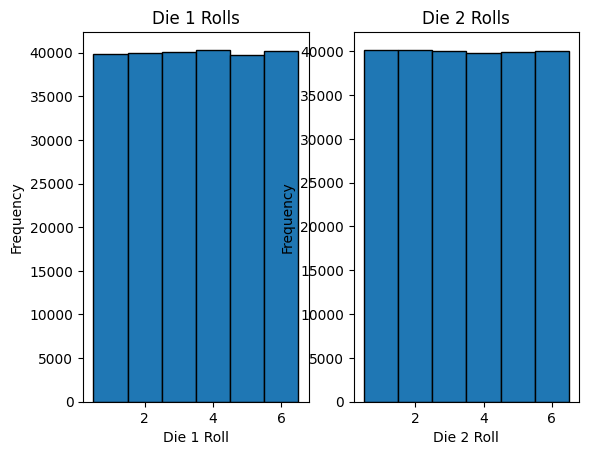

In [5]:
#############################################################
# AUTHOR:     Group 5
# COURSE:     ANLY 615
# PROGRAM:    Project-Fall-2024 - Problem 4: Probability of Doubles Simulation
# PURPOSE:    Simulate rolling two dice 24 times over 10,000 games to estimate
#             the probability of rolling at least one double six in each game.
# HONOR CODE: On my honor, as an Aggie, I have neither given
#             nor received unauthorized aid on this academic work.
#############################################################

import pandas as pd
import random
import os
import matplotlib.pyplot as plt

#create a function for rolling a die
def roll():
  die1= random.randint(1,6)
  die2= random.randint(1,6)

  if die1 == die2:
    doubles = 1
  else:
    doubles = 0
  if die1 == 6 and die2 == 6:
    double_six = 1
  else:
    double_six = 0
  return die1, die2, doubles, double_six

#create a function for a single game and storing results
def game(game_num):
  game_stats= []
  ds_count = 0

  for i in range(24):
    die1, die2, doubles, double_six = roll()
    if double_six:
      ds_count += 1
    game_stats.append({
        'Game': game_num,
        'Roll': i + 1,
        'Die 1': die1,
        'Die 2': die2,
        'Doubles': doubles,
        'Double Sixes': double_six
    })

 # Determine if double sixes occurred and who won
    double_sixes = ds_count > 0
    if double_sixes:
      winner = "Gambler"
    else:
      winner = "House"

    game_results = {
        'Game': game_num,
        'Double Sixes': double_sixes,
        'Winner': winner,
        'Number of Double Sixes': ds_count
    }

  return game_stats, game_results

def main():

  #for 10000 games create 2 files that return all the rolls and the outcome of the game
  # store in CSV
  rolls = []
  games = []
  for i in range(10000):
    #collect game data
    game_stats, game_results = game(i+1)

    #store game and roll data
    #use extend to not add all 24 rolls as one item but as each a sepearate item in the list
    rolls.extend(game_stats)
    games.append(game_results)

  # Convert roll data and game summaries to DataFrames
  rolls_df = pd.DataFrame(rolls)
  games_df = pd.DataFrame(games)

  # Save the data to CSV files
  rolls_df.to_csv('dice_rolls.csv', index=False)
  games_df.to_csv('game_summaries.csv', index=False)

  ## calculate how many times double sixes was true for each game and divide by 10000
  ds_count= games_df['Double Sixes'].sum()
  probability = round((ds_count/10000)*100)
  print(f"The probability of rolling double sixes in 10,000 games is {probability}%")

  #create a histogram to plot the number of times each number was rolled on die 1 and 2 to figure out if the randmoization was equivalent
  #die 1
  # Histogram for Die-1
  plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
  plt.hist(rolls_df['Die 1'], bins=range(1, 8), edgecolor='black', align='left')
  plt.xlabel('Die 1 Roll')
  plt.ylabel('Frequency')
  plt.title('Die 1 Rolls')

# Histogram for Die-2
  plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
  plt.hist(rolls_df['Die 2'], bins=range(1, 8), edgecolor='black', align='left')
  plt.xlabel('Die 2 Roll')
  plt.ylabel('Frequency')
  plt.title('Die 2 Rolls')


if __name__ == "__main__":
  main()